In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
plt.style.use('dark_background')

In [2]:
df_train = pd.read_csv('MNIST_CSV/mnist_train.csv', header=None)
df_test = pd.read_csv('MNIST_CSV/mnist_test.csv', header=None)
df_train

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59997,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
df_test

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
y_train = df_train[0].to_numpy()
y_test = df_test[0].to_numpy()
x_train = df_train.iloc[:, 1:785].to_numpy()
x_test = df_test.iloc[:, 1:785].to_numpy()

print(np.bincount(y_train))
print(np.bincount(y_test))

[5923 6742 5958 6131 5842 5421 5918 6265 5851 5949]
[ 980 1135 1032 1010  982  892  958 1028  974 1009]


In [5]:
x_train_img = np.reshape(x_train, (60000, 28, 28))
x_test_img = np.reshape(x_test, (10000, 28, 28))

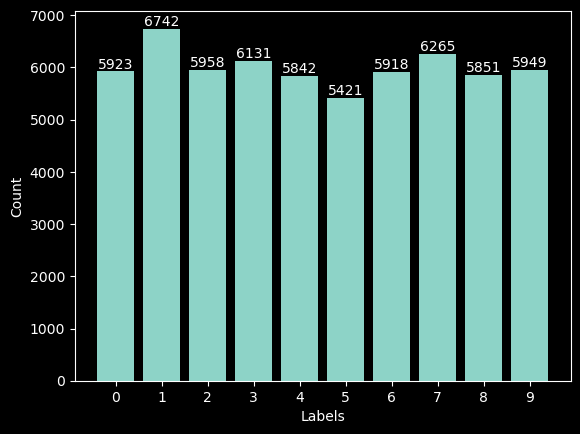

In [6]:
unique_labels, label_counts = np.unique(y_train, return_counts=True)

plt.bar(unique_labels, label_counts)

for i, count in enumerate(label_counts):
    plt.text(i, count, str(count), ha='center', va='bottom')

plt.xticks(range(len(unique_labels)), unique_labels)
plt.xlabel('Labels')
plt.ylabel('Count')
# plt.savefig('Images/train_set_distn.png')
plt.show()

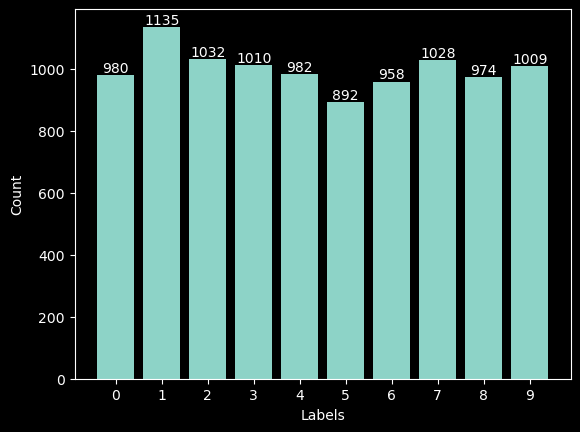

In [7]:
unique_labels, label_counts = np.unique(y_test, return_counts=True)

plt.bar(unique_labels, label_counts)

for i, count in enumerate(label_counts):
    plt.text(i, count, str(count), ha='center', va='bottom')

plt.xticks(range(len(unique_labels)), unique_labels)
plt.xlabel('Labels')
plt.ylabel('Count')
# plt.savefig('Images/test_set_distn.png')
plt.show()

In [8]:
#displaying 2 images from each label in training dataset
idx = {}
labels = np.unique(y_train)

for i, val in enumerate(y_train):
    if val not in idx:
        idx[val] = [i]
    else:
        if len(idx[val]) == 2:
            continue
        idx[val].append(i)

idx = dict(sorted(idx.items()))
idx

{0: [1, 21],
 1: [3, 6],
 2: [5, 16],
 3: [7, 10],
 4: [2, 9],
 5: [0, 11],
 6: [13, 18],
 7: [15, 29],
 8: [17, 31],
 9: [4, 19]}

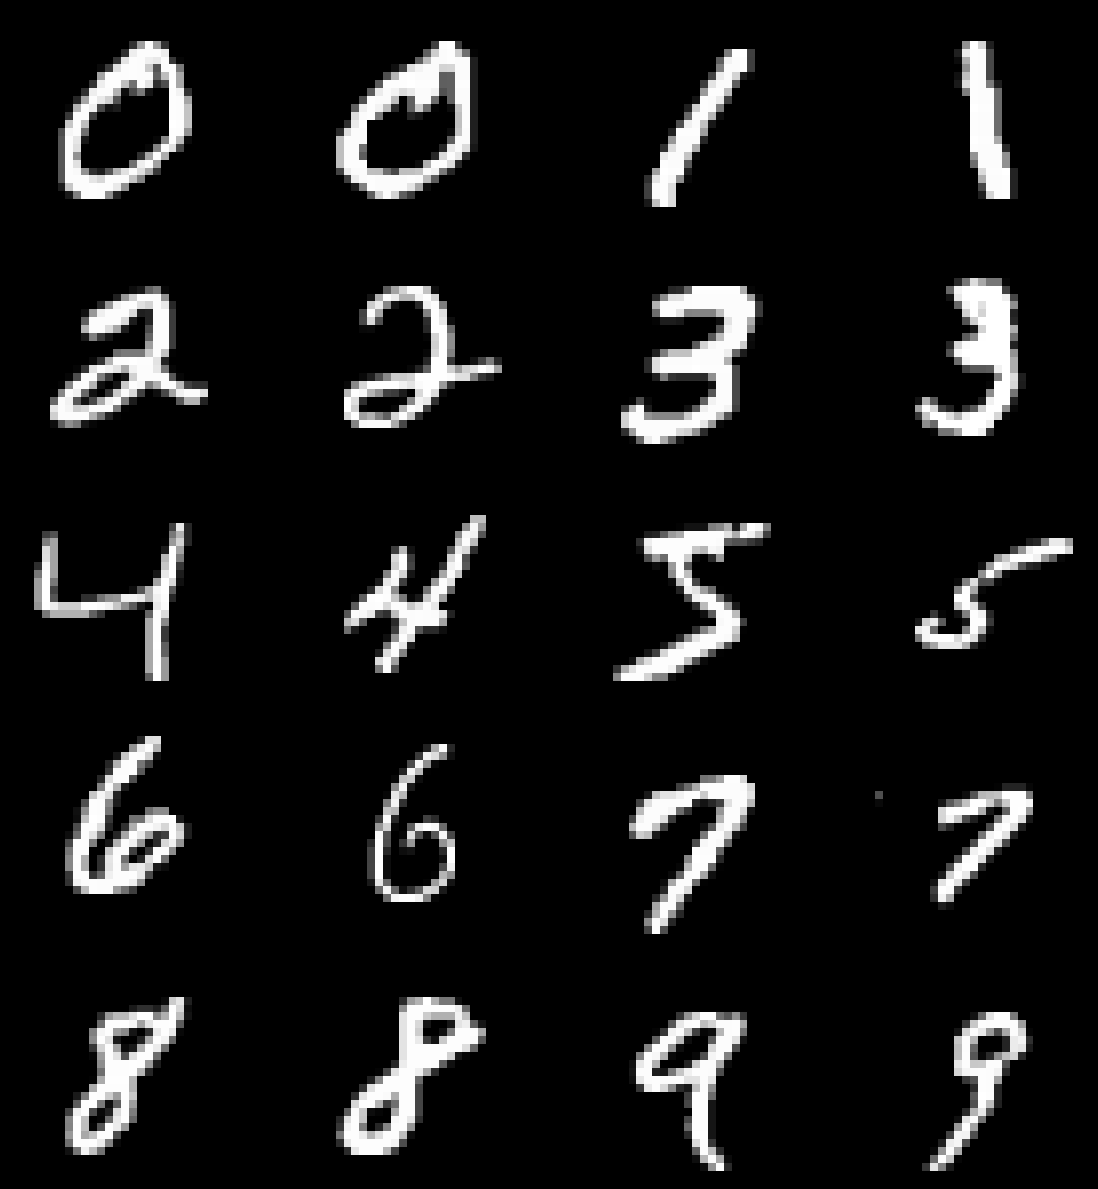

In [9]:
idx_list = []
for i in idx:
    idx_list.extend(idx[i])

fig, axes = plt.subplots(5, 4, figsize=(12, 12))

for i, ax in enumerate(axes.flat):
    ax.imshow(x_train_img[idx_list[i]], cmap='gray')
    ax.axis('off')

plt.tight_layout()
# plt.savefig('Images/training_2numbers_eachlabel.png')
plt.show()

In [10]:
sc = StandardScaler()
x_train_mean = sc.fit_transform(x_train)

pca = PCA(n_components=0.99)
x_train_pca = pca.fit_transform(x_train_mean, y_train)
print(pca.n_components_)

pca = PCA(n_components=0.98)
x_train_pca = pca.fit_transform(x_train_mean, y_train)
n = pca.n_components_
print(n)

543
459
